# Predict Batch Performance

### Importing libraries for EDA

In [1]:
# import EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing modelling libraries

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 

from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

### Import training dataset

In [3]:
train = pd.read_csv('train.csv')
train.head(5)

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,x1_t2,x1_t3,x1_t4,x1_t5,x1_t6,x2_t0,x2_t1,x2_t2,x2_t3,x2_t4,x2_t5,x2_t6,x3_t0,x3_t1,x3_t2,x3_t3,x3_t4,x3_t5,x3_t6,x4_t0,x4_t1,x4_t2,x4_t3,x4_t4,x4_t5,x4_t6,x5_t0,x5_t1,x5_t2,x5_t3,x5_t4,x5_t5,x5_t6,x6_t0,x6_t1,x6_t2,x6_t3,x6_t4,x6_t5,x6_t6,x7_t0,x7_t1,x7_t2,x7_t3,x7_t4,x7_t5,x7_t6,x8_t0,x8_t1,x8_t2,x8_t3,x8_t4,x8_t5,x8_t6,x9_t0,x9_t1,x9_t2,x9_t3,x9_t4,x9_t5,x9_t6,x10_t0,x10_t1,x10_t2,x10_t3,x10_t4,x10_t5,x10_t6,x11_t0,x11_t1,x11_t2,x11_t3,x11_t4,x11_t5,x11_t6,x12_t0,x12_t1,x12_t2,x12_t3,x12_t4,x12_t5,x12_t6,x13_t0,x13_t1,x13_t2,x13_t3,x13_t4,x13_t5,x13_t6,x14_t0,x14_t1,x14_t2,x14_t3,x14_t4,x14_t5,x14_t6,x15_t0,x15_t1,x15_t2,x15_t3,x15_t4,x15_t5,x15_t6,x16_t0,x16_t1,x16_t2,x16_t3,x16_t4,x16_t5,x16_t6,x17_t0,x17_t1,x17_t2,x17_t3,x17_t4,x17_t5,x17_t6,x18_t0,x18_t1,x18_t2,x18_t3,x18_t4,x18_t5,x18_t6,x19_t0,x19_t1,x19_t2,x19_t3,x19_t4,x19_t5,x19_t6,x20_t0,x20_t1,x20_t2,x20_t3,x20_t4,x20_t5,x20_t6,x21_t0,x21_t1,x21_t2,x21_t3,x21_t4,x21_t5,x21_t6,x22_t0,x22_t1,x22_t2,x22_t3,x22_t4,x22_t5,x22_t6,x23_t0,x23_t1,x23_t2,x23_t3,x23_t4,x23_t5,x23_t6,x24_t0,x24_t1,x24_t2,x24_t3,x24_t4,x24_t5,x24_t6,x25_t0,x25_t1,x25_t2,x25_t3,x25_t4,x25_t5,x25_t6,x26_t0,x26_t1,x26_t2,x26_t3,x26_t4,x26_t5,x26_t6,x27_t0,x27_t1,x27_t2,x27_t3,x27_t4,x27_t5,x27_t6,x28_t0,x28_t1,x28_t2,x28_t3,x28_t4,x28_t5,x28_t6,x29_t0,x29_t1,x29_t2,x29_t3,x29_t4,x29_t5,x29_t6,x30_t0,x30_t1,x30_t2,x30_t3,x30_t4,x30_t5,x30_t6,x32_t0,x32_t1,x32_t2,x32_t3,x32_t4,x32_t5,x32_t6,x31_t0,x31_t1,x31_t2,x31_t3,x31_t4,x31_t5,x31_t6,x34_t0,x34_t1,x34_t2,x34_t3,x34_t4,x34_t5,x34_t6,x33_t0,x33_t1,x33_t2,x33_t3,x33_t4,x33_t5,x33_t6,x36_t0,x36_t1,x36_t2,x36_t3,x36_t4,x36_t5,x36_t6,x35_t0,x35_t1,x35_t2,x35_t3,x35_t4,x35_t5,x35_t6,x37_t0,x37_t1,x37_t2,x37_t3,x37_t4,x37_t5,x37_t6,x38_t0,x38_t1,x38_t2,x38_t3,x38_t4,x38_t5,x38_t6,x39_t0,x39_t1,x39_t2,x39_t3,x39_t4,x39_t5,x39_t6,x40_t0,x40_t1,x40_t2,x40_t3,x40_t4,x40_t5,x40_t6,x41_t0,x41_t1,x41_t2,x41_t3,x41_t4,x41_t5,x41_t6,x42_t0,x42_t1,x42_t2,x42_t3,x42_t4,x42_t5,x42_t6,x43_t0,x43_t1,x43_t2,x43_t3,x43_t4,x43_t5,x43_t6,x44_t0,x44_t1,x44_t2,x44_t3,x44_t4,x44_t5,x44_t6,x45_t0,x45_t1,x45_t2,x45_t3,x45_t4,x45_t5,x45_t6,x46_t0,x46_t1,x46_t2,x46_t3,x46_t4,x46_t5,x46_t6,x47_t0,x47_t1,x47_t2,x47_t3,x47_t4,x47_t5,x47_t6,x48_t0,x48_t1,x48_t2,x48_t3,x48_t4,x48_t5,x48_t6,x49_t0,x49_t1,x49_t2,x49_t3,x49_t4,x49_t5,x49_t6,x50_t0,x50_t1,x50_t2,x50_t3,x50_t4,x50_t5,x50_t6,x51_t0,x51_t1,x51_t2,x51_t3,x51_t4,x51_t5,x51_t6,x52_t0,x52_t1,x52_t2,x52_t3,x52_t4,x52_t5,x52_t6,x53_t0,x53_t1,x53_t2,x53_t3,x53_t4,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6,y2
0,706,762.212216,753.162754,754.610620,762.787135,768.170347,769.815486,750.950000,0.902534,0.873314,0.807268,0.862909,0.836029,0.902826,1.37600,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.262724,21.044805,21.449664,20.734400,21.135345,20.868361,27.900000,6.7,6.7,6.7,6.7,6.7,6.7,6.9,748.773616,745.635196,745.722604,747.266661,753.433793,752.713959,746.300000,788.799988,788.799988,788.799988,788.799988,788.799988,788.799988,795.830000,810.299988,810.299988,810.299988,810.299988,810.299988,810.299988,816.480000,4.4,4.4,4.4,4.4,4.4,4.4,4.4,0.243978,0.244055,0.245363,0.248112,0.335132,0.257364,0.310000,81.980046,82.087889,82.129742,82.093134,82.041982,82.008582,81.490000,15.277053,13.794279,16.751010,21.203234,24.425490,26.686207,9.400000,473.514571,473.415871,471.324834,472.325497,468.656301,469.211082,421.730000,460.856047,458.579524,454.148703,451.174712,446.458846,439.673132,495.530000,0.897013,0.897303,0.897223,0.897176,0.897156,0.897131,0.900000,1300.0,1300.0,1300.0,1300.0,1300.0,1300.0,1704.25,65.0,65.0,65.0,65.0,65.0,65.0,55.66,702.238299,701.240283,696.300131,694.692963,701.764607,701.260836,697.240000,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27.000000,27.000000,27.015366,27.0,27.0,27.0,27.0,751.197977,758.306068,768.134158,790.719635,784.526051,775.290000,775.29,0.407567,0.810007,0.647788,0.651062

In [33]:
train.shape

(794, 387)

### Replacing 7 individual readings from each sensor with their mean

In [47]:
data = train.copy()

In [48]:
# Loop to create a mean column for each sensor and dropping the respective 7 readings
for i in range(0,55):
    col_list = []
    sensor = 'x'+str(i)
    for j in range(0,7):
        col = 'x'+str(i)+'_t'+str(j)
        col_list.append(col)
    data[sensor] = data[col_list].mean(axis=1)
    data.drop(col_list, axis=1, inplace=True)

In [49]:
data.head()

,Id,y2,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54
0,706,0.72,760.244080,0.937269,1.0,22.056471,6.728571,748.549404,789.804275,811.182847,4.4,0.269143,81.975911,18.219610,464.311165,458.060138,0.897572,1357.750000,63.665714,699.248160,80.0,80.0,1.0,27.002195,771.923413,0.620713,0.571429,0.0,11.432371,822.512086,0.142857,3875.245378,452.398282,14.892789,14.497143,35.365725,34.963383,97.788514,97.905714,0.000000,0.0,51.572556,86.043619,0.198817,1.0,0.857143,0.142857,0.000000,85.856746,0.857143,700.196065,119.060403,14.758329,878.637498,646.594635,89.693307,1.892407
1,239,0.62,757.366380,1.379567,1.0,26.895488,6.500000,749.596987,845.599976,840.799988,4.5,0.279756,76.698810,54.505696,481.326723,427.410667,0.900295,1700.000000,57.000000,696.463580,80.0,80.0,1.0,29.000000,774.974019,0.492991,0.642857,0.0,12.956240,820.825508,0.071429,4085.155006,382.562997,16.859722,14.070000,39.216508,38.602857,97.847874,97.952857,0.000000,0.0,60.232345,85.091646,0.192942,1.0,0.928571,0.071429,0.000000,84.719534,0.928571,547.953130,132.105129,19.044833,886.672018,712.281086,74.327068,1.913206
2,613,0.57,757.052327,0.864291,1.0,22.271551,6.900000,820.260866,793.147153,815.468561,4.4,0.209458,82.139933,9.297903,413.788298,433.359535,0.901479,1357.750000,64.522857,697.047573,80.0,80.0,1.0,28.020719,774.704272,0.596236,0.571429,0.0,11.748918,802.226723,0.142857,3753.099335,521.043722,17.320135,14.497143,35.175877,35.205714,97.723647,97.863713,0.142857,0.0,57.449495,90.279048,0.200046,1.0,0.142857,0.857143,0.142857,91.578217,0.571429,547.210846,109.675539,13.939582,861.906494,676.498573,87.959533,2.052945
3,588,1.01,760.571769,0.808450,1.0,28.319341,6.900000,753.283047,793.147153,815.468561,4.4,0.181063,81.888624,118.440647,421.961638,547.761377,0.901376,1700.607143,55.094286,700.842542,80.0,80.0,1.0,27.000000,717.249578,0.537579,0.428571,0.0,13.462370,793.734623,0.142857,3711.580815,512.376801,14.688665,14.497143,35.313175,35.348571,97.611068,97.695710,0.142857,0.0,52.399161,88.480221,0.196191,1.0,0.142857,0.857143,0.000000,89.831031,0.857143,630.162187,137.102413,14.898321,871.835244,653.640959,88.314801,1.940227
4,780,-0.42,768.801759,0.822851,1.0,19.236735,6.814286,760.840050,775.918551,766.868551,4.4,0.290602,82.104374,2.552850,525.866158,536.969565,0.851040,1357.750000,64.522857,697.671191,80.0,80.0,1.0,26.694875,797.721864,0.534037,0.714286,0.0,12.589026,833.061031,0.142857,3751.611019,456.618927,16.125748,14.497143,34.151372,34.634286,97.850337,97.905714,0.000000,0.0,92.823810,87.816697,0.197166,1.0,0.857143,0.142857,0.142857,88.506798,0.714286,497.926779,91.554997,14.059461,855.777351,640.448159,87.042743,2.248662


In [50]:
data.shape

(794, 57)

### Check for missing data

In [53]:
data.isnull().sum()

Id     0
y2     0
x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
x50    0
x51    0
x52    0
x53    0
x54    0
dtype: int64

### Class imbalance

In [54]:
# we are finding the percentage of each class in the feature 'y'
class_values = (data['y2'].value_counts()/data['y2'].value_counts().sum())*100
print(class_values)

 0.60    15.239295
 0.45    11.586902
 0.58    11.209068
 0.59    10.705290
 0.44     8.942065
 0.46     5.793451
 0.43     5.541562
 0.57     4.534005
 0.61     3.778338
 0.72     2.896725
 0.30     2.896725
 0.73     2.015113
 0.00     1.763224
 0.74     1.133501
 0.62     1.133501
 0.31     1.133501
 0.76     1.007557
 0.77     1.007557
 0.71     1.007557
 0.47     0.881612
 0.42     0.755668
 0.75     0.629723
 0.15     0.377834
 0.87     0.377834
 0.29     0.251889
 0.16     0.251889
 0.63     0.251889
 0.56     0.251889
 0.70     0.125945
 1.01     0.125945
 1.50     0.125945
 0.50     0.125945
 0.88     0.125945
-0.14     0.125945
 1.60     0.125945
 0.14     0.125945
 0.41     0.125945
-0.48     0.125945
 1.08     0.125945
 1.04     0.125945
-1.66     0.125945
-0.42     0.125945
 1.21     0.125945
-0.16     0.125945
 1.09     0.125945
 1.03     0.125945
 0.85     0.125945
-0.73     0.125945
 0.55     0.125945
Name: y2, dtype: float64


### Check for outliers

In [55]:
cols = list(data) # A List of all features

outliers = pd.DataFrame(columns=['Feature','Number of Outliers']) # Creating a new dataframe to

for column in cols: # Iterating thorough each feature
    if column in data.select_dtypes(include=np.number).columns: # checking if the feature contains numeric data
            
            # first quartile (Q1)
        q1 = data[column].quantile(0.25) 
            
            # third quartile (Q3)
        q3 = data[column].quantile(0.75)
            
            # IQR
        iqr = q3 - q1
            
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        
        outliers = outliers.append({'Feature':column,'Number of Outliers':data.loc[(data[column] < fence_low) | (data[column] > fence_high)].shape[0]},ignore_index=True)
outliers

,Feature,Number of Outliers
0,Id,0
1,y2,39
2,x0,10
3,x1,0
4,x2,5
5,x3,4
6,x4,0
7,x5,60
8,x6,0
9,x7,0


### Univariate Analysis

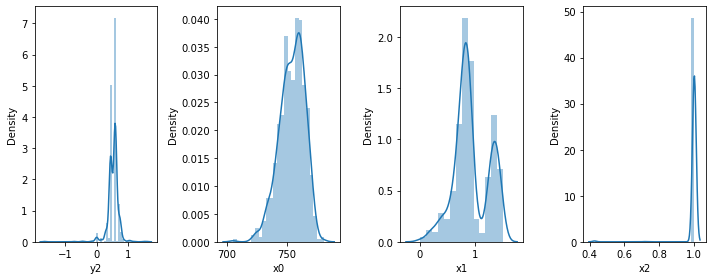

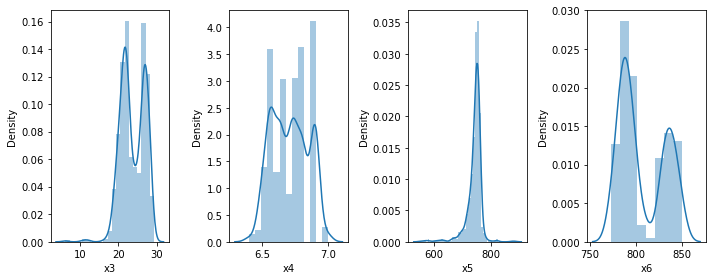

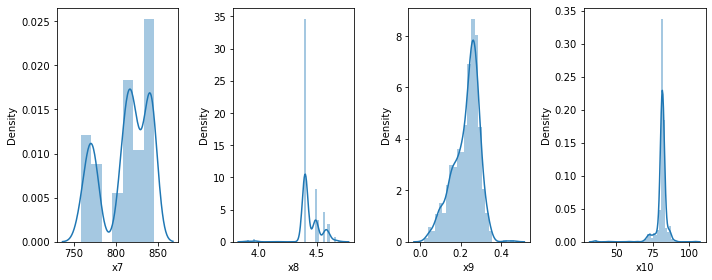

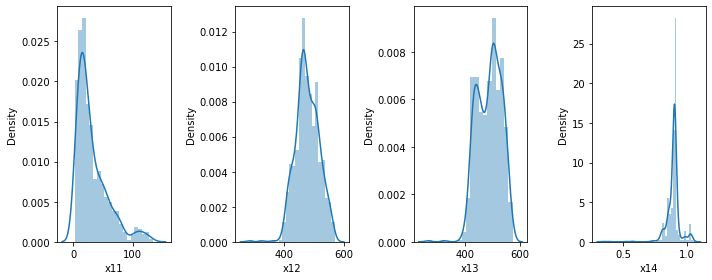

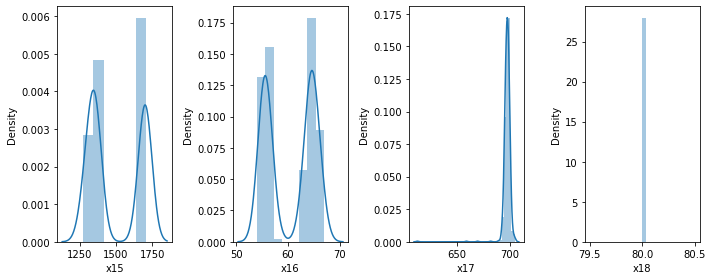

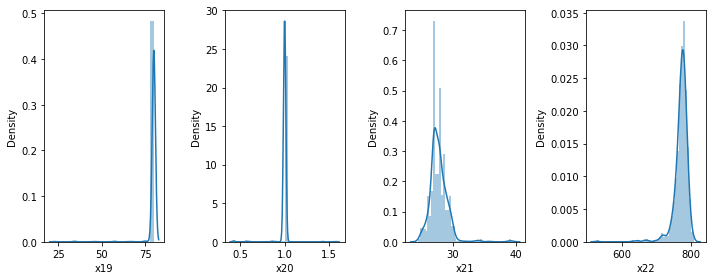

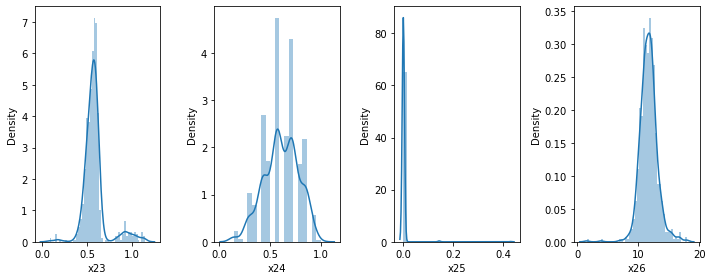

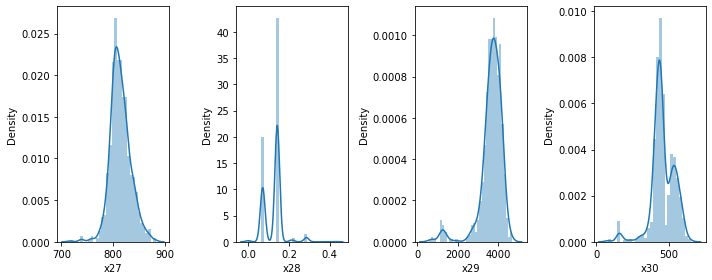

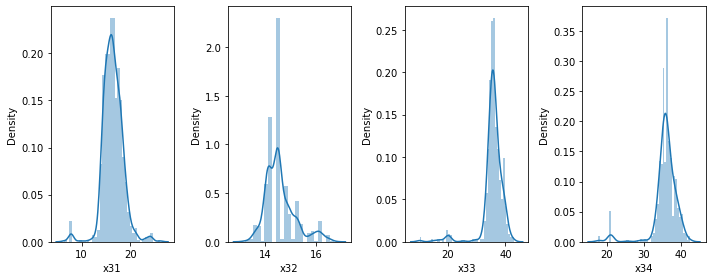

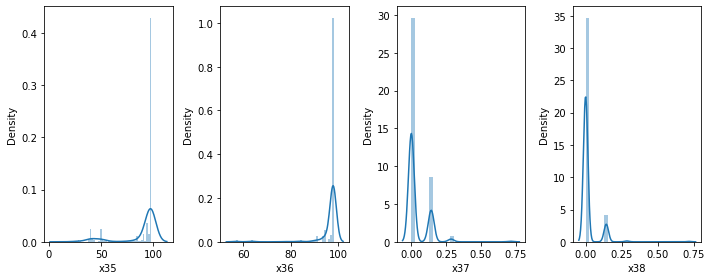

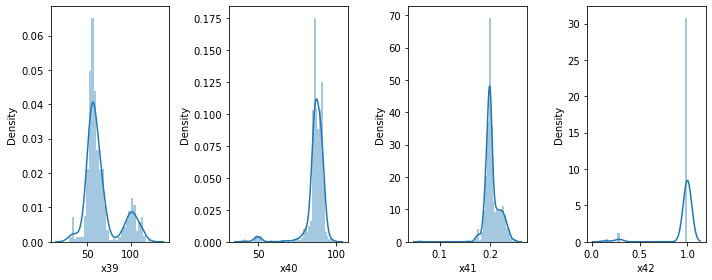

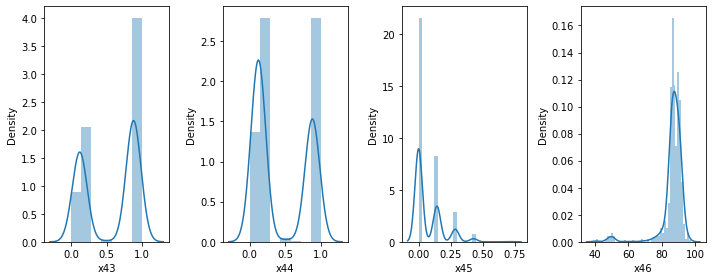

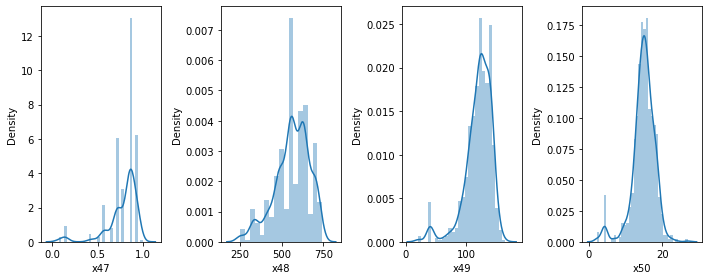

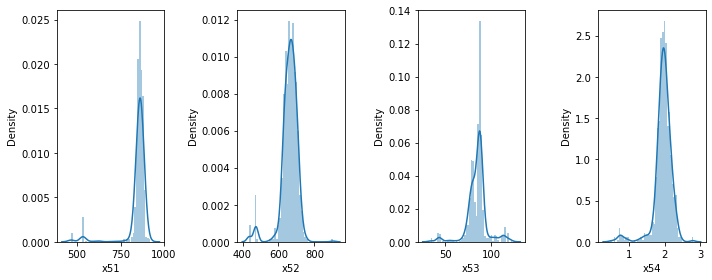

In [82]:
# Code to plot histograms
numeric_columns = data.select_dtypes(include=['number']).columns.tolist()
# data = data[numeric_columns]
numeric_columns.remove('Id')    
for i in range(0,len(numeric_columns),4):
    if len(numeric_columns) > i+3:
        plt.figure(figsize=(10,4))
        plt.subplot(141)
        sns.distplot(data[numeric_columns[i]], kde=True)
        plt.subplot(142)            
        sns.distplot(data[numeric_columns[i+1]], kde=True)
        plt.subplot(143)            
        sns.distplot(data[numeric_columns[i+2]], kde=True)
        plt.subplot(144)            
        sns.distplot(data[numeric_columns[i+3]], kde=True)
        plt.tight_layout()
        plt.show()
    elif len(numeric_columns) > i+2:
        plt.figure(figsize=(10,4))
        plt.subplot(141)
        sns.distplot(data[numeric_columns[i]], kde=True)
        plt.subplot(142)            
        sns.distplot(data[numeric_columns[i+1]], kde=True)
        plt.subplot(143)            
        sns.distplot(data[numeric_columns[i+2]], kde=True)
    elif len(numeric_columns) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(141)
        sns.distplot(data[numeric_columns[i]], kde=True)
        plt.subplot(142)            
        sns.distplot(data[numeric_columns[i+1]], kde=True)
    else:
        sns.distplot(data[numeric_columns[i]], kde=True)

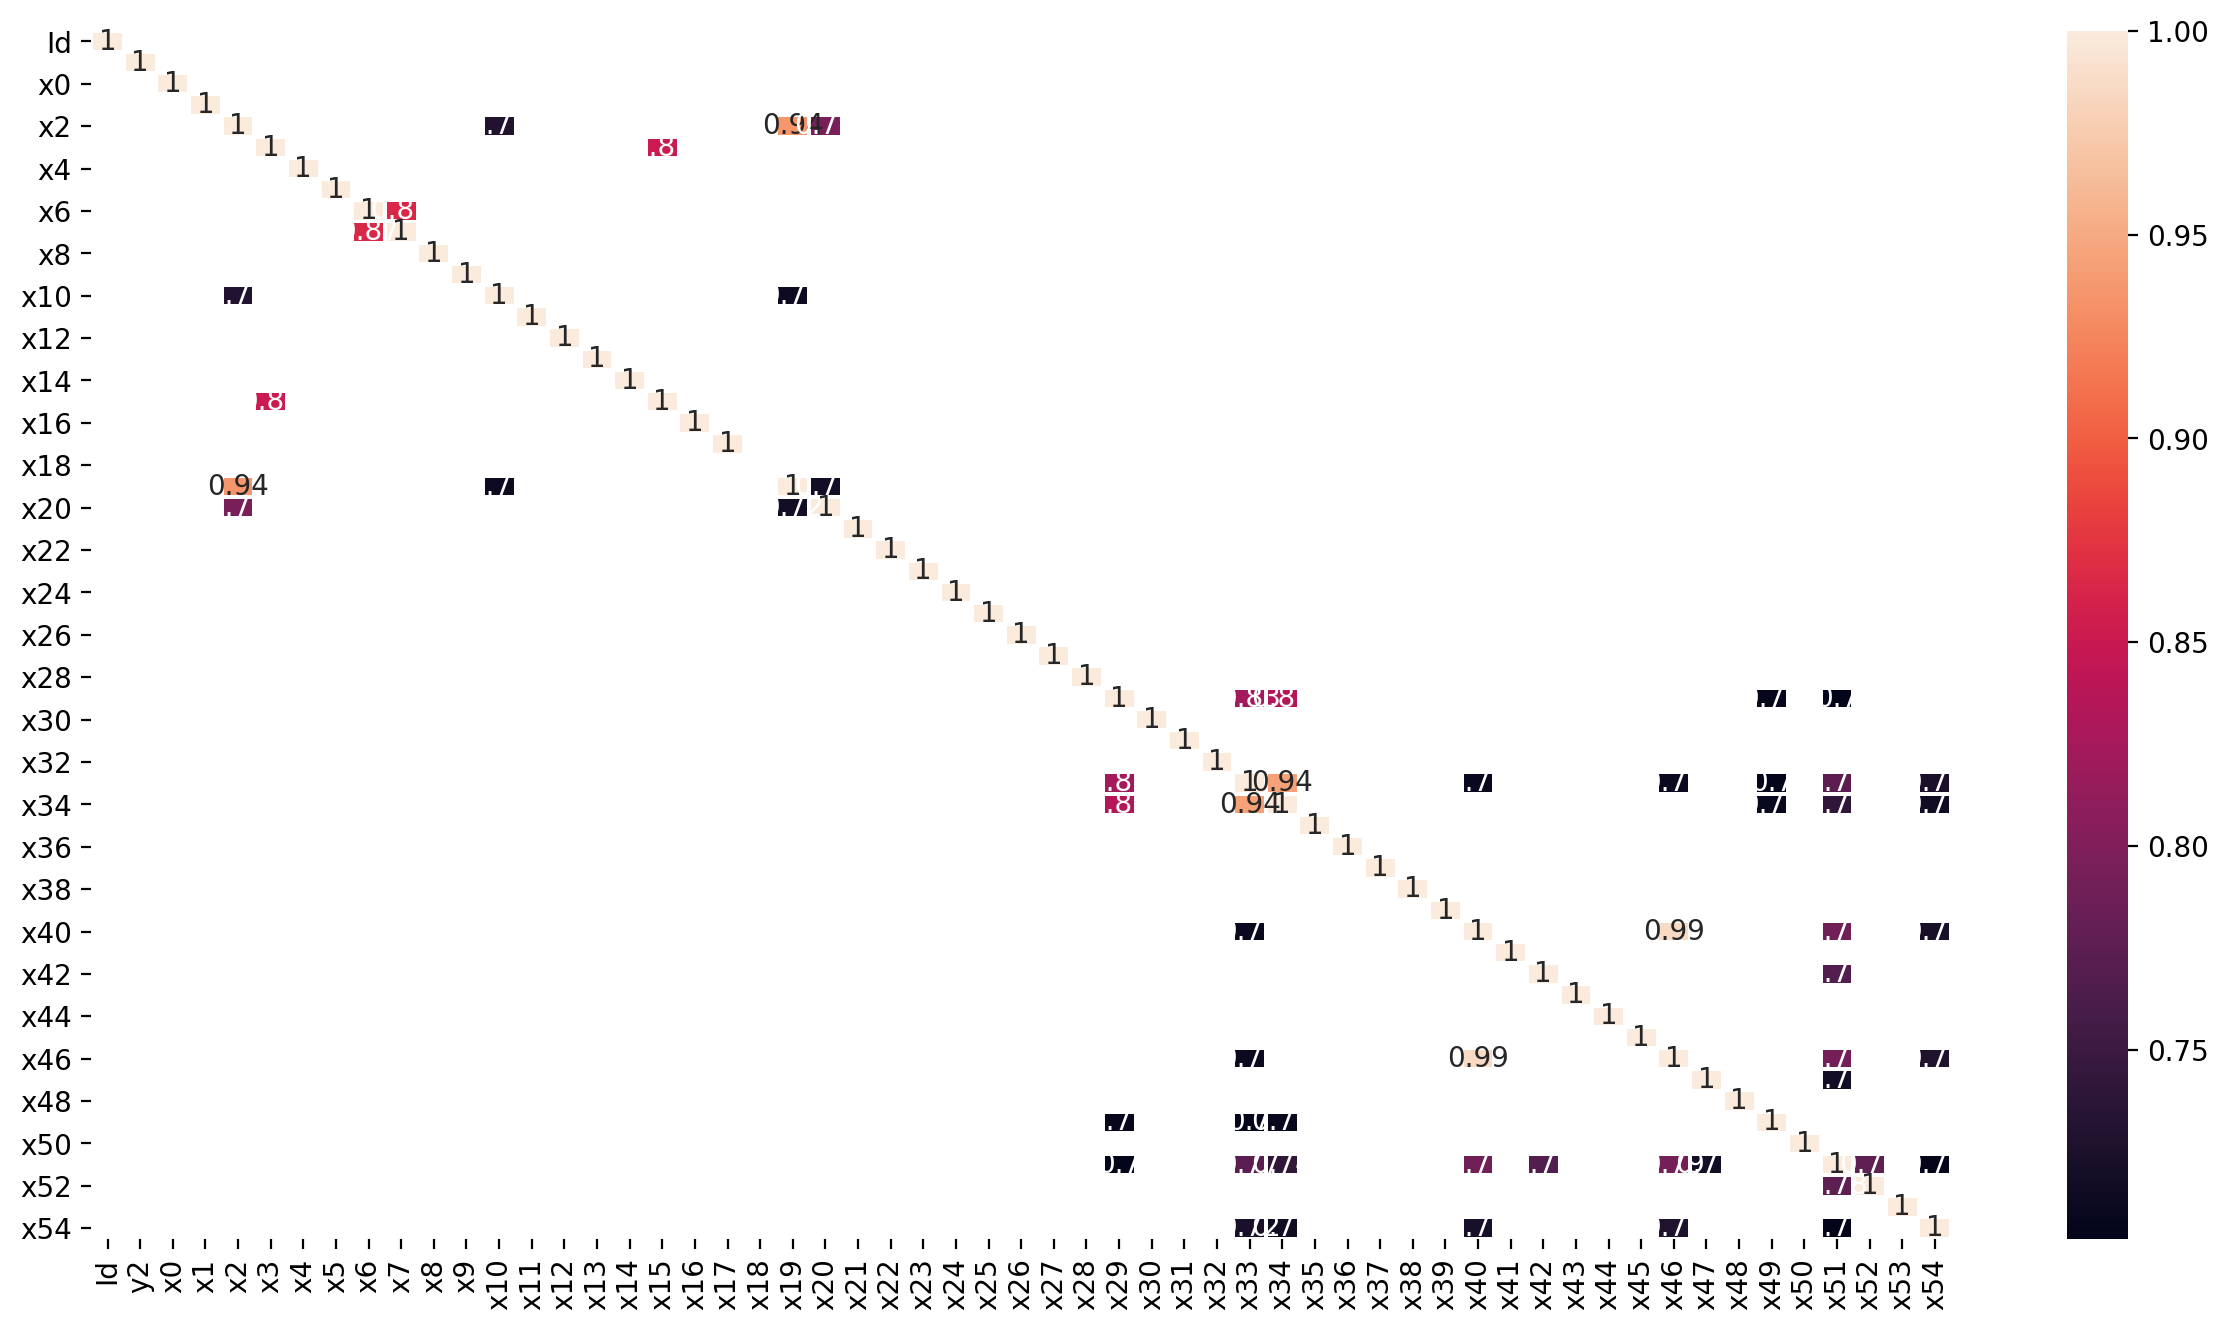

In [102]:
plt.figure(figsize=(15,8), dpi=200)
sns.heatmap(data.corr()[data.corr()>0.70], annot=True, linewidth=1)